In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [5]:
dataset = pd.read_csv("housing.csv")

In [6]:
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [7]:
dataset.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [8]:
feature = dataset['median_income']
target_var = dataset['median_house_value']

def line(m,x,c):
    return m*x+c;

def error(m,x,c,y):
    return np.mean((m*x+c-y)**2)

def derivative_slope(m,x,c,y):
    return 2 * (np.mean(m*x+c-y) * x)

def derivative_intercept(m,x,c,y):
    return 2 * (np.mean(m*x+c-y) * 1)

def accuracy_prediction(current_error,y):
    return 100- ((current_error/np.mean(y)**2) * 100)

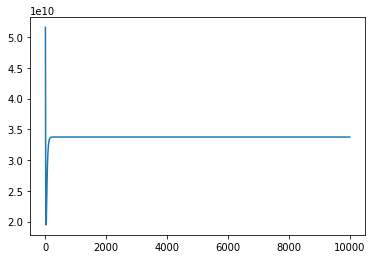

In [24]:
m = random.random()
c = random.random()
cost = []
alpha = 0.001
for i in range(0,10000):
    m = m - alpha * (derivative_slope(m,feature,c,target_var))
    c = c - alpha * (derivative_intercept(m,feature,c,target_var))
    cost.append(error(m,feature,c,target_var))

plt.plot(cost)
plt.show()

In [25]:
print("Your Algo achieved: ",accuracy_prediction(error(m,feature,c,target_var),target_var), "%" )

Your Algo achieved:  21.12104754732681 %


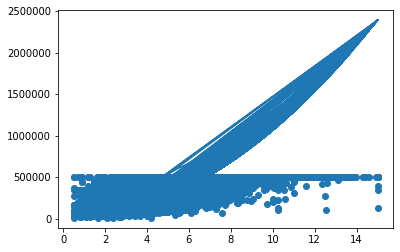

In [26]:
predicted_answers = line(m,feature,c)
plt.scatter(feature,target_var)
plt.plot(feature,predicted_answers)
plt.show()